<a href="https://colab.research.google.com/github/betray682/CNN_CPP/blob/master/pytorch_acquaintance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import urllib.request
url = '	https://www.nippon.com/cn/ncommon/contents/japan-glances/2003393/2003393.jpg'
fpath = 'coffee.jpg'
urllib.request.urlretrieve(url,fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x7868728bc410>)

img = cv2.imread(fpath)
plt.imshow(img)
plt.axis('off') # Turn off axis numbers and ticks
plt.show()


['.config', 'coffee.jpg', 'sample_data']


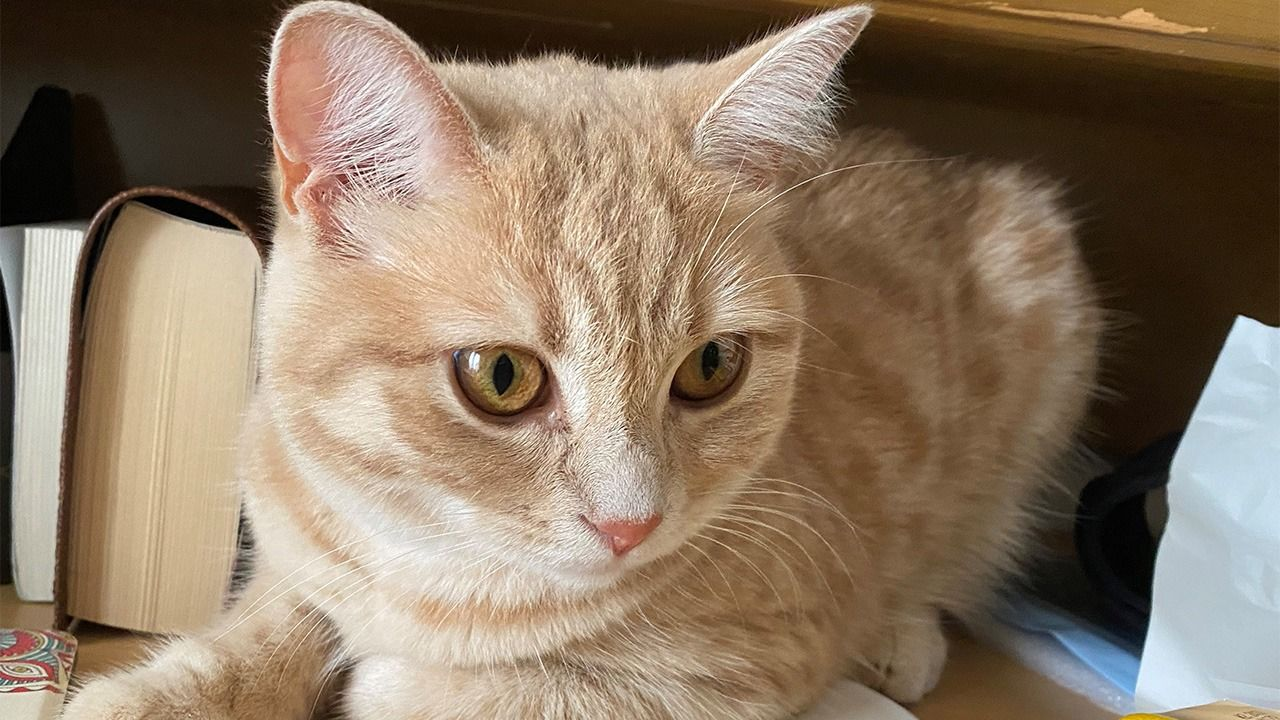

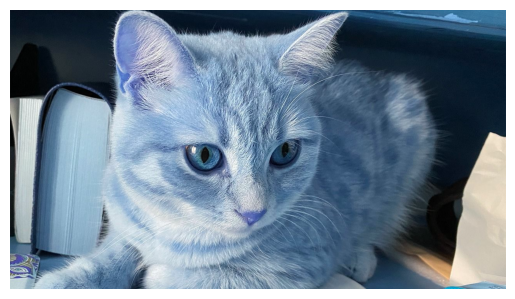

In [28]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow,cv2
from PIL import Image
from pathlib import Path
current_dir = Path('.')

file_names = [file.name for file in current_dir.iterdir()]
print(file_names)

img = cv2.imread('coffee.jpg')
import os
#print(os.path.abspath('.'))
cv2_imshow(img)
img = Image.fromarray(img.astype('uint8'))

plt.imshow(img)
plt.axis('off') # Turn off axis numbers and ticks
plt.show()

## 加载预训练模型

### Subtask:
加载一个适用于图像任务的预训练 Transformer 模型，例如 Vision Transformer。


**Reasoning**:
Import the necessary Vision Transformer model class and load a pre-trained model.



In [12]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

## 图像预处理

### Subtask:
对图像进行预处理，使其符合模型的输入要求（例如调整大小、归一化等）。


**Reasoning**:
Load the image, import the image processor, instantiate it, and preprocess the image.



In [13]:
image = cv2.imread('coffee.jpg')
from transformers import ViTImageProcessor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
inputs = processor(images=image, return_tensors="pt")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

## 模型推理

### Subtask:
将预处理后的图像输入到模型中进行推理。


**Reasoning**:
Perform a forward pass with the model using the preprocessed inputs, access the logits, apply softmax to get probabilities, find the predicted class index, and store it.



In [17]:
import torch
import torch.nn.functional as F

outputs = model(**inputs)
logits = outputs.logits
probabilities = F.softmax(logits, dim=1)
predicted_class_index = torch.argmax(probabilities, dim=1).item()

**Reasoning**:
The previous code failed because the `torch` library was not explicitly imported in the code block. I will add the import statement and rerun the code.



In [18]:
import torch
import torch.nn.functional as F

outputs = model(**inputs)
logits = outputs.logits
probabilities = F.softmax(logits, dim=1)
predicted_class_index = torch.argmax(probabilities, dim=1).item()

## 结果展示

### Subtask:
展示模型的输出结果。


**Reasoning**:
Access the model's configuration to get the mapping from class indices to class labels, retrieve the corresponding class label using the predicted class index, and print the predicted class label.



In [19]:
predicted_class_label = model.config.id2label[predicted_class_index]
print(f"Predicted class label: {predicted_class_label}")

Predicted class label: tabby, tabby cat


## Summary:

### Data Analysis Key Findings

*   The necessary libraries, `transformers` and `torch`, were already installed.
*   A pre-trained Vision Transformer model (`google/vit-base-patch16-224`) was successfully loaded for image classification.
*   The image "coffee.jpg" was loaded using OpenCV and successfully preprocessed using the corresponding `ViTImageProcessor`, converting it into the required PyTorch tensor format for model input.
*   Model inference was performed on the preprocessed image, and the predicted class index was determined by calculating the softmax probabilities and finding the index with the highest probability.
*   The predicted class label corresponding to the predicted class index was retrieved from the model's configuration and identified as "tabby, tabby cat".

### Insights or Next Steps

*   The workflow for loading, preprocessing, and performing inference with a pre-trained Vision Transformer model on an image is established and functional.
*   To further validate the model's performance, the predicted class label could be compared against the actual content of the "coffee.jpg" image.


In [27]:
from torchvision import transforms
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),\
                                 transforms.Normalize(mean = [0.465,0.456,0.234],std = [0.223,0.224,0.123])])

im_tensor = transform(image)
print(type(img_tensor),im_tensor.shape)

TypeError: Unexpected type <class 'numpy.ndarray'>

In [30]:
print(img.shape)
pil_image = Image.fromarray(image.astype('uint8'))
im_tensor = transform(pil_image)
print(type(im_tensor), im_tensor.shape)
print(torch.cuda.is_available())


(720, 1280, 3)
<class 'torch.Tensor'> torch.Size([3, 224, 224])
False


In [32]:
torch.empty(100,200)
#torch.zeros(100,200)
#torch.ones(100,200)

tensor([[1.4013e-43, 0.0000e+00, 7.8064e-33,  ..., 6.3068e+13, 8.3030e-33,
         1.3563e-19],
        [7.2243e+28, 1.7836e+31, 1.6509e+28,  ..., 1.8058e+28, 4.1220e+21,
         3.2799e-09],
        [1.1704e-19, 1.1004e+13, 5.7157e+04,  ..., 1.0646e+24, 8.2880e-33,
         1.3563e-19],
        ...,
        [8.8437e-18, 8.8437e-18, 8.8437e-18,  ..., 7.7764e+31, 2.7947e+20,
         1.1704e-19],
        [7.3845e+20, 6.9474e+22, 2.0616e-19,  ..., 7.5554e+28, 5.2839e-11,
         1.3180e+25],
        [1.8319e+25, 4.3064e+21, 2.9390e+29,  ..., 1.8675e+34, 1.7589e+22,
         4.7429e+30]])

In [43]:
torch.rand(5,2)
torch.randn(10,3)
import numpy as np
c = np.random.rand(3,4)
d = torch.tensor(c)
print(c,'\n',d)


[[0.45060243 0.38274782 0.7759579  0.89706392]
 [0.27404549 0.36670601 0.71916324 0.58032878]
 [0.68312211 0.76425047 0.80769349 0.85882985]] 
 tensor([[0.4506, 0.3827, 0.7760, 0.8971],
        [0.2740, 0.3667, 0.7192, 0.5803],
        [0.6831, 0.7643, 0.8077, 0.8588]], dtype=torch.float64)


In [32]:
import torch
x =torch.tensor([[1,2],[3,4],[5,6],[7,8]])
print(x)
print(x.T)
print(x[x>4])
x.T
print(x.view((2,4)))
print(x.view(2,4))
a = torch

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 3, 5, 7],
        [2, 4, 6, 8]])
tensor([5, 6, 7, 8])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
